<a href="https://colab.research.google.com/github/mclarafreitas/Reconhecimento-Facial/blob/main/Reconhecimento_Facil_Final2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando e importando o OpenCV CV2

In [ ]:
!pip install opencv-python
import cv2
from google.colab.patches import cv2_imshow

#Conectando-se ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importando imagem do Drive

Mostrando quais arquvios está na pasta

In [ ]:
import os

caminho = '/content/drive/MyDrive/Images'

# Percorre todos os arquivos e subdiretórios do diretório especificado
for pasta_raiz, sub_pastas, arquivos in os.walk(caminho):
    for arquivo in arquivos:
        caminho_completo = os.path.join(pasta_raiz, arquivo)
        print(caminho_completo)

/content/drive/MyDrive/Images/1.jpg
/content/drive/MyDrive/Images/2.png
/content/drive/MyDrive/Images/3.jpeg


# Reconhecimneto facial

Haar cascade pré-treinado para detecção de faces frontais

In [ ]:
import requests
import numpy as np
import urllib

# URL do arquivo XML
url = 'https://raw.githubusercontent.com/Patotricks15/Rapydinhas/main/Detec%C3%A7%C3%A3o%20de%20faces%20(OpenCV%20%2B%20Haar%20Cascade)/haarcascade_frontalface_default.xml'

# Fazer o download do arquivo XML
response = requests.get(url)
with open('haarcascade_frontalface_default.xml', 'wb') as file:
    file.write(response.content)



Detecta a face, recorta e salva no Drive o ROI

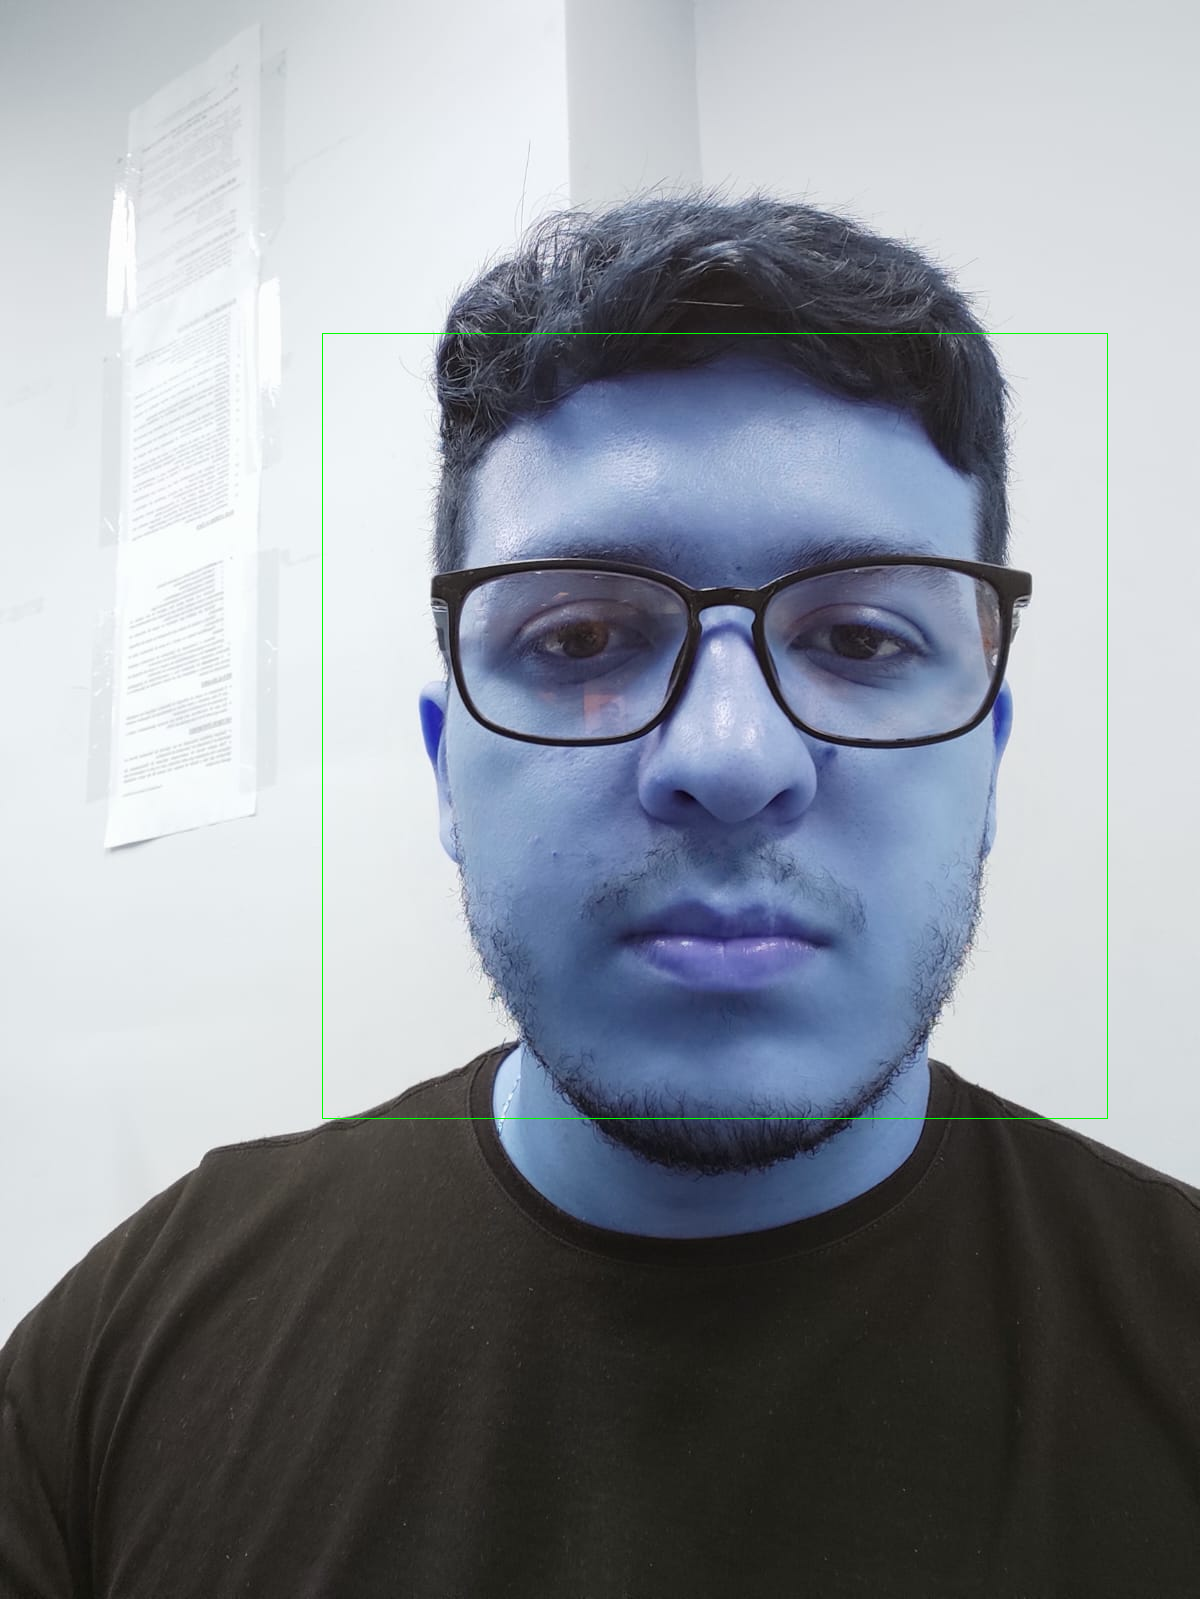

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Carregar o classificador Haar cascade
detec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Carregar a imagem
imagem_redimensionada = cv2.imread("/content/drive/MyDrive/Images/3.jpeg")

# Converter a imagem para escala de cinza
cinza = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_BGR2GRAY)

# Detectar a face
face = detec.detectMultiScale(cinza, 1.3, 3)

# Desenhar retângulos ao redor das faces detectadas
for (x, y, larg, alt) in face:
    roi = imagem_redimensionada[y:y+alt, x:x+larg]  # Recorta a região de interesse
    cv2.imwrite("roi.jpg", roi)  # Salvar a região de interesse como uma nova imagem
    cv2.rectangle(imagem_redimensionada, (x, y), (x + larg, y + alt), (0, 255, 0), 1)

# Converter a imagem redimensionada de volta para RGB para exibição correta
imagem_rgb = cv2.cvtColor(imagem_redimensionada, cv2.COLOR_BGR2RGB)

# Exibir a imagem com as faces detectadas
cv2_imshow(imagem_rgb)


In [ ]:
!pip install oauth2client

# Salva a imagem ROI

In [ ]:
from google.colab import drive
import cv2

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para a pasta onde deseja salvar a imagem
pasta_destino = '/content/drive/MyDrive/ROI/'

nome = input("Digite seu nome: ")

# Caminho completo para a imagem
caminho_imagem = pasta_destino + f'ID_{nome}.jpg'

# Salvar a imagem usando OpenCV
cv2.imwrite(caminho_imagem, roi)

print('Imagem salva com sucesso em:', caminho_imagem)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Digite seu nome: yuri
Imagem salva com sucesso em: /content/drive/MyDrive/ROI/ID_yuri.jpg
